<IPython.core.display.Javascript object>


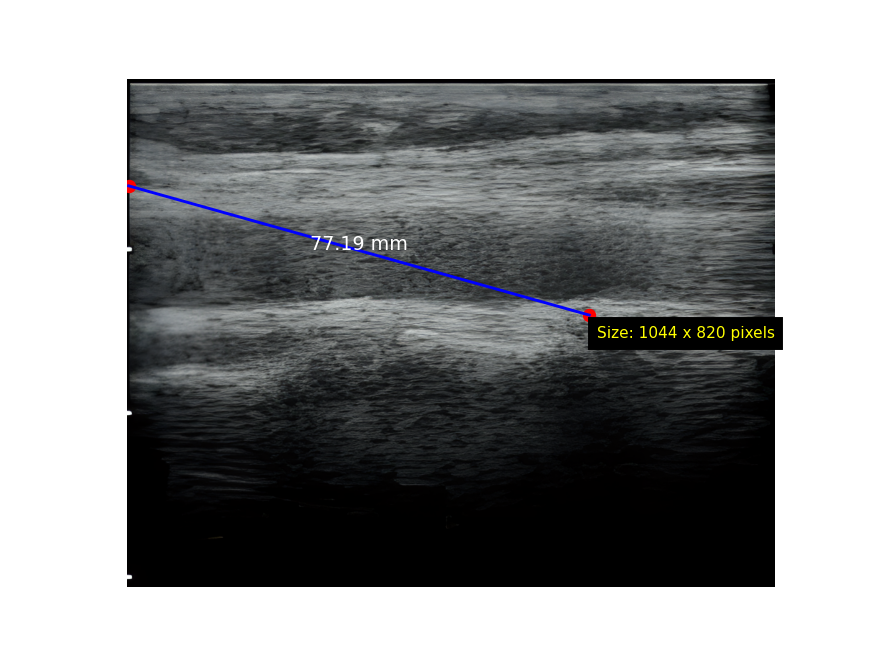

In [26]:
%matplotlib notebook
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Hypothetical scale: 1 pixel = 0.1 mm
pixel_to_mm = 0.1

# Load your image
image_path = r'C:\Users\priye\Desktop\EngineeringProject\Aswathy_Upscaled_png_images\DICM0016_SR.png' # Replace with the correct path
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
fig, ax = plt.subplots()
ax.imshow(image_rgb)
plt.axis('off')


# Function to handle clicks and draw lines
points = []
def onclick(event):
    if event.xdata is not None and event.ydata is not None:
        # Record click positions and draw red dots
        points.append((event.xdata, event.ydata))
        ax.plot(event.xdata, event.ydata, 'ro')
        
        if len(points) == 2:
            # Draw a line between points
            ax.plot([points[0][0], points[1][0]], [points[0][1], points[1][1]], 'b-')
            
            # Calculate distance in pixels and convert to mm
            pixel_distance = np.sqrt((points[1][0] - points[0][0])**2 + (points[1][1] - points[0][1])**2)
            mm_distance = pixel_distance * pixel_to_mm
            
            # Display the distance in mm
            mid_point = ((points[0][0]+points[1][0])/2, (points[0][1]+points[1][1])/2)
            ax.text(mid_point[0], mid_point[1], f"{mm_distance:.2f} mm", color='white', ha='center')

            # Clear points for the next measurement
            points.clear()
            
        fig.canvas.draw()

# Connect the onclick function to the figure
fig.canvas.mpl_connect('button_press_event', onclick)

# Add the image's pixel size as text to the plot
ax.text(image.shape[1], image.shape[0]/2, f"Size: {image.shape[1]} x {image.shape[0]} pixels",
        color='yellow', ha='right', va='center', fontsize=8, backgroundcolor='black')

plt.show()


<IPython.core.display.Javascript object>


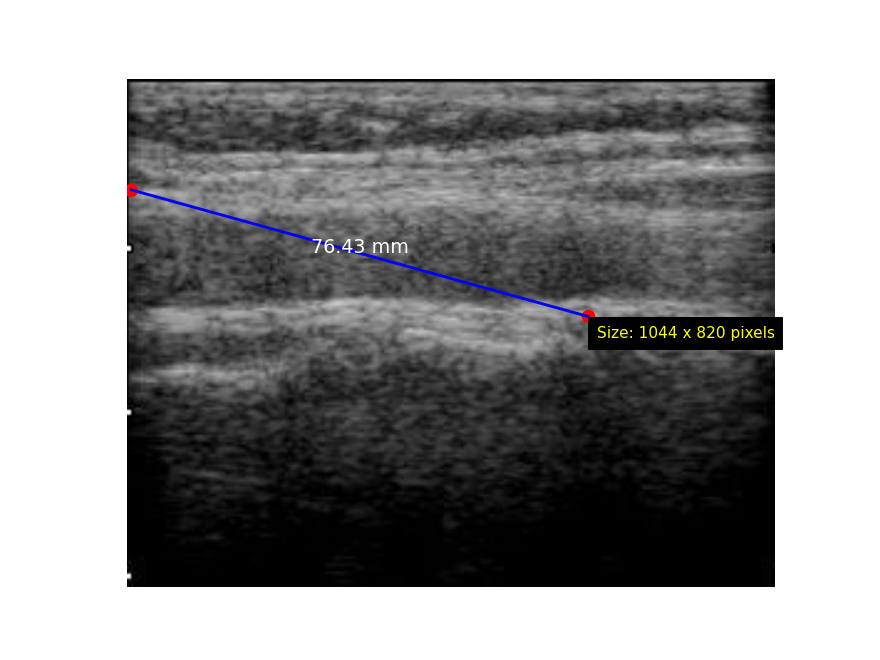

In [27]:
%matplotlib notebook
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Hypothetical scale: 1 pixel = 0.1 mm
pixel_to_mm = 0.1

# Load your image
image_path = r'C:\Users\priye\Desktop\EngineeringProject\Aswathy_Upscaled_png_images\DICM0016-img-00001-00001_CUTCOPY_48FR_highresolution.jpg' # Replace with the correct path
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
fig, ax = plt.subplots()
ax.imshow(image_rgb)
plt.axis('off')


# Function to handle clicks and draw lines
points = []
def onclick(event):
    if event.xdata is not None and event.ydata is not None:
        # Record click positions and draw red dots
        points.append((event.xdata, event.ydata))
        ax.plot(event.xdata, event.ydata, 'ro')
        
        if len(points) == 2:
            # Draw a line between points
            ax.plot([points[0][0], points[1][0]], [points[0][1], points[1][1]], 'b-')
            
            # Calculate distance in pixels and convert to mm
            pixel_distance = np.sqrt((points[1][0] - points[0][0])**2 + (points[1][1] - points[0][1])**2)
            mm_distance = pixel_distance * pixel_to_mm
            
            # Display the distance in mm
            mid_point = ((points[0][0]+points[1][0])/2, (points[0][1]+points[1][1])/2)
            ax.text(mid_point[0], mid_point[1], f"{mm_distance:.2f} mm", color='white', ha='center')

            # Clear points for the next measurement
            points.clear()
            
        fig.canvas.draw()

# Connect the onclick function to the figure
fig.canvas.mpl_connect('button_press_event', onclick)

# Add the image's pixel size as text to the plot
ax.text(image.shape[1], image.shape[0]/2, f"Size: {image.shape[1]} x {image.shape[0]} pixels",
        color='yellow', ha='right', va='center', fontsize=8, backgroundcolor='black')

plt.show()

<IPython.core.display.Javascript object>


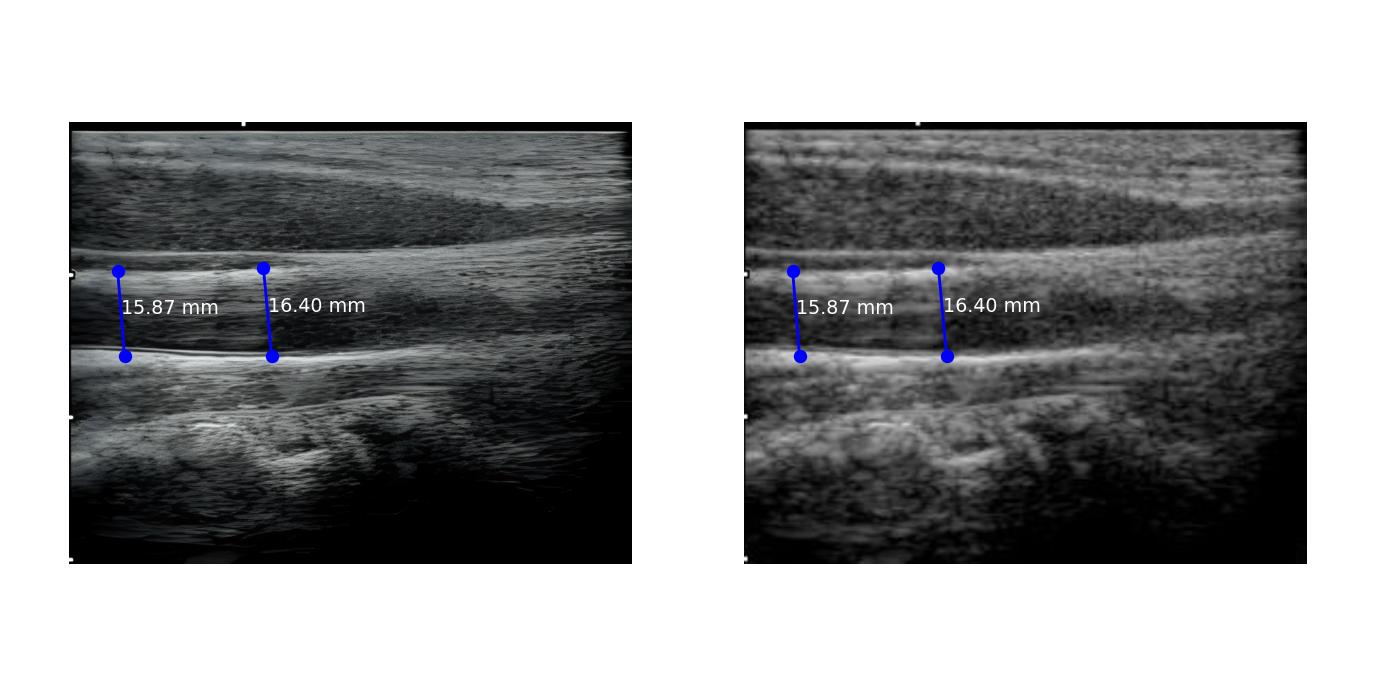

In [42]:
%matplotlib notebook
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Hypothetical scale: 1 pixel = 0.1 mm
pixel_to_mm = 0.1

# Function to calculate and draw the measurement between two points
def measure_distance(points, image_rgb, ax):
    ax.imshow(image_rgb)
    plt.axis('off')

    # Draw red points and a blue line between them
    ax.plot([points[0][0], points[1][0]], [points[0][1], points[1][1]], 'bo-')
    
    # Calculate distance in pixels and convert to mm
    pixel_distance = np.sqrt((points[1][0] - points[0][0])**2 + (points[1][1] - points[0][1])**2)
    mm_distance = pixel_distance * pixel_to_mm
    
    # Display the distance in mm
    mid_point = ((points[0][0]+points[1][0])/2, (points[0][1]+points[1][1])/2)
    ax.text(mid_point[0], mid_point[1], f"{mm_distance:.2f} mm", color='white', ha='left')
    plt.show()

# Load the first image
image_path1 = r'C:\Users\priye\Desktop\EngineeringProject\Aswathy_Upscaled_png_images\DICM0048_SR.png' # Replace with the correct path to the first image
image1 = cv2.imread(image_path1)
image_rgb1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

# Load the second image
image_path2 = r'C:\Users\priye\Desktop\EngineeringProject\Aswathy_Upscaled_png_images\DICM0048-img-00001-00001_CUTCOPY_48FR_highresolution.jpg' # Replace with the correct path to the second image
image2 = cv2.imread(image_path2)
image_rgb2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# Initialize points list and create figure and axes with a larger size
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # Here you can adjust the figure size

# Function to handle clicks
def onclick(event):
    global points
    if event.xdata is not None and event.ydata is not None:
        # Record click positions
        points.append((event.xdata, event.ydata))

        if len(points) == 2:
            # Measure distance on the first image
            measure_distance(points, image_rgb1, axs[0])
            
            # Measure distance on the second image with the same points
            measure_distance(points, image_rgb2, axs[1])

            # Clear points for the next measurement
            points.clear()

# Connect the onclick function to the figure
fig.canvas.mpl_connect('button_press_event', onclick)

# Display the initial images with adjusted subplot layout for better spacing
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=0.2, hspace=0.2)
axs[0].imshow(image_rgb1)
axs[0].axis('off')
axs[1].imshow(image_rgb2)
axs[1].axis('off')
plt.show()

 

<IPython.core.display.Javascript object>


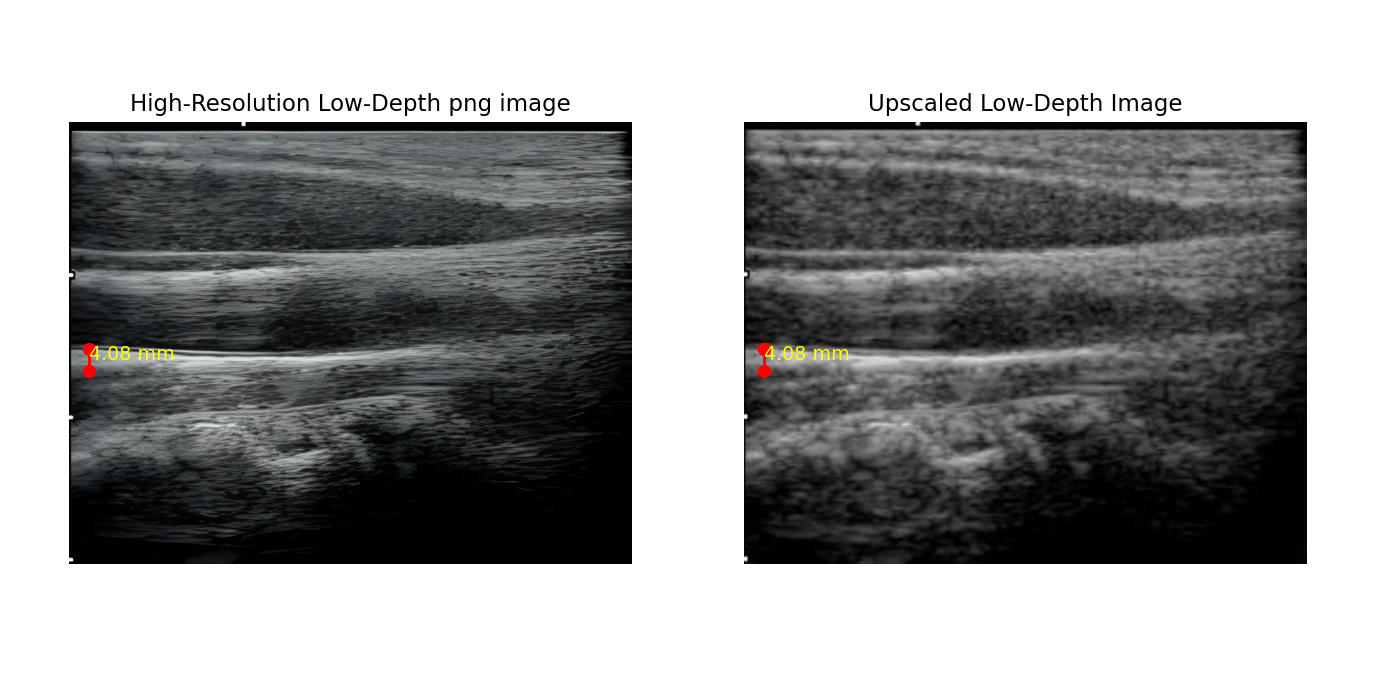

In [66]:
%matplotlib notebook
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Hypothetical scale: 1 pixel = 0.1 mm
pixel_to_mm = 0.1

# Function to calculate and draw the measurement between two points
def measure_distance(points, image_rgb, ax, title):
    ax.imshow(image_rgb)
    ax.set_title(title)  # Set the title for the current axis
    plt.axis('off')

    # Draw red points and a blue line between them
    ax.plot([points[0][0], points[1][0]], [points[0][1], points[1][1]], 'ro-')
    
    # Calculate distance in pixels and convert to mm
    pixel_distance = np.sqrt((points[1][0] - points[0][0])**2 + (points[1][1] - points[0][1])**2)
    mm_distance = pixel_distance * pixel_to_mm
    
    # Display the distance in mm
    mid_point = ((points[0][0]+points[1][0])/2, (points[0][1]+points[1][1])/2)
    ax.text(mid_point[0], mid_point[1], f"{mm_distance:.2f} mm", color='yellow', ha='left')
    plt.show()

# Load the first image
image_path1 = r'C:\Users\priye\Desktop\EngineeringProject\Aswathy_Upscaled_png_images\DICM0048_SR.png' # Replace with the correct path to the first image
image1 = cv2.imread(image_path1)
image_rgb1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

# Load the second image
image_path2 = r'C:\Users\priye\Desktop\EngineeringProject\Aswathy_Upscaled_png_images\DICM0048-img-00001-00001_CUTCOPY_48FR_highresolution.jpg' # Replace with the correct path to the second image
image2 = cv2.imread(image_path2)
image_rgb2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# Initialize points list and create figure and axes with a larger size
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # Here you can adjust the figure size

# Function to handle clicks
def onclick(event):
    global points
    if event.xdata is not None and event.ydata is not None:
        # Record click positions
        points.append((event.xdata, event.ydata))

        if len(points) == 2:
            # Measure distance on the first image with a title
            measure_distance(points, image_rgb1, axs[0], "High-Resolution Low-Depth png image")
            
            # Measure distance on the second image with the same points and a title
            measure_distance(points, image_rgb2, axs[1], "Upscaled Low-Depth Image")

            # Clear points for the next measurement
            points.clear()

# Connect the onclick function to the figure
fig.canvas.mpl_connect('button_press_event', onclick)

# Display the initial images with adjusted subplot layout for better spacing
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=0.2, hspace=0.2)
axs[0].imshow(image_rgb1)
axs[0].axis('off')
axs[1].imshow(image_rgb2)
axs[1].axis('off')
plt.show()


<IPython.core.display.Javascript object>


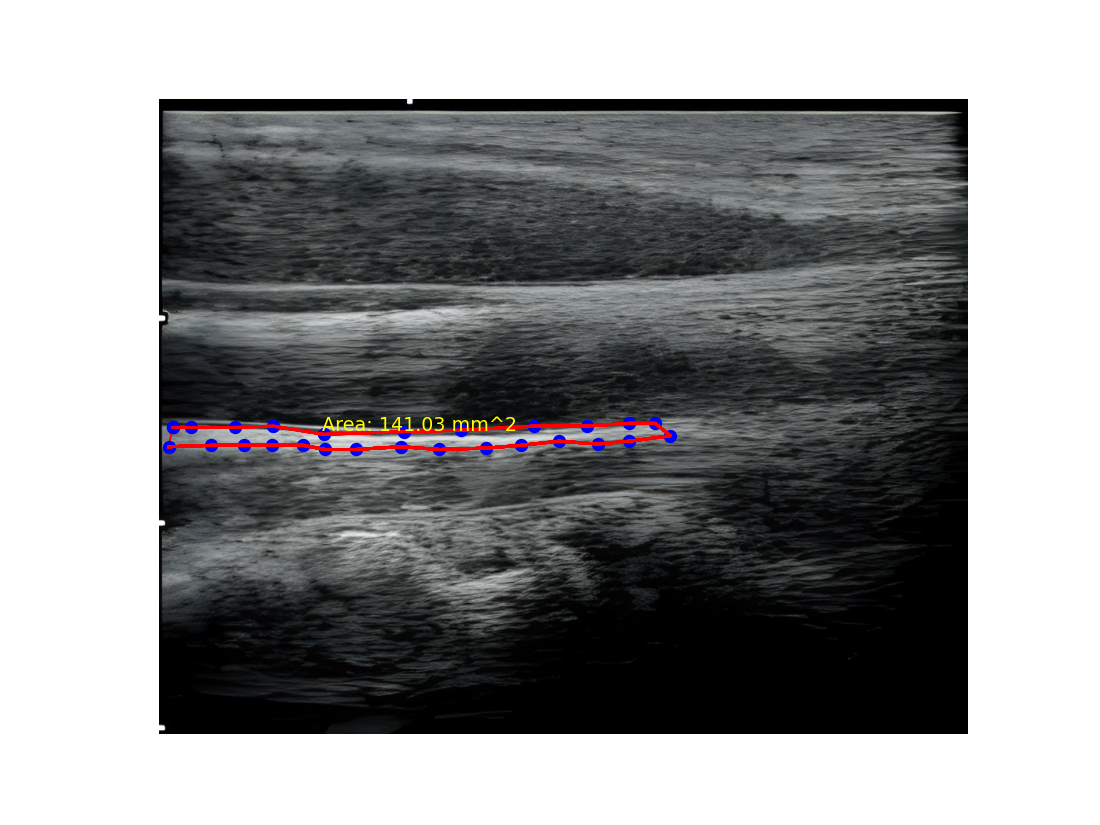

In [87]:
%matplotlib notebook
import matplotlib.pyplot as plt
import cv2
import numpy as np
from matplotlib.path import Path

# Hypothetical scale: 1 pixel = 0.1 mm
pixel_to_mm = 0.1

# Initialize points list and create figure and axes with a larger size
fig, ax = plt.subplots(figsize=(8, 6))

# Function to draw the points and calculate the area
def draw_polygon(points, ax):
    # Create a Path object from the points and close it
    path = Path(points + [points[0]], closed=True)
    
    # Draw the polygon and set the title
    patch = plt.Polygon(points, fill=None, edgecolor='r')
    ax.add_patch(patch)
    
    # Find the bounding box of the points to create a grid
    x_min, y_min = np.min(points, axis=0)
    x_max, y_max = np.max(points, axis=0)
    x_grid, y_grid = np.meshgrid(np.arange(x_min, x_max), np.arange(y_min, y_max))
    grid_points = np.vstack((x_grid.flatten(), y_grid.flatten())).T
    
    # Calculate the area (number of points inside the polygon) multiplied by the scale factor
    grid_inside = path.contains_points(grid_points)
    area_pixels = grid_inside.sum()
    area_mm = area_pixels * (pixel_to_mm**2)
    
    # Display the area in white font within the image
#     text_x = 0.5 * (x_min + x_max)
#     text_y = 0.5 * (y_min + y_max)
#     ax.text(text_x, text_y, f"Area: {area_mm:.2f} mm^2", color='orange', ha='center', va='center')
#     plt.show()
    
    
    # Display the area in orange font above the polygon
    text_x = 0.5 * (x_min + x_max)  # Horizontally center the text between the leftmost and rightmost points
    text_y = y_min - 10  # Position the text 10 pixels above the topmost point of the polygon

    # Use the 'ax.text' method to place the text
    ax.text(text_x, text_y, f"Area: {area_mm:.2f} mm^2", color='yellow', ha='center', va='top')
    plt.show()



# Function to handle clicks
def onclick(event):
    if event.dblclick:  # Check if double click
        if len(points) > 2:  # Need at least 3 points to form a polygon
            draw_polygon(points, ax)
            fig.canvas.draw()
            points.clear()  # Clear points after drawing polygon
        else:
            print("Need at least three points to form a polygon.")
    else:
        if event.xdata is not None and event.ydata is not None:
            points.append((event.xdata, event.ydata))
            ax.plot(event.xdata, event.ydata, 'bo')  # Plot red dot
            if len(points) > 1:  # If at least two points, draw connecting lines
                ax.plot([p[0] for p in points], [p[1] for p in points], 'r-')
            fig.canvas.draw()

# Load your image
image_path = r'C:\Users\priye\Desktop\EngineeringProject\Aswathy_Upscaled_png_images\DICM0048_SR.png' # Replace with your image's path
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
ax.imshow(image_rgb)
plt.axis('off')

# Connect the onclick function to the figure
fig.canvas.mpl_connect('button_press_event', onclick)

points = []  # List to store points

plt.show()
